In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp

In [2]:
graph = nx.read_edgelist('data/twitter_combined.txt', create_using=nx.DiGraph(), nodetype=int)

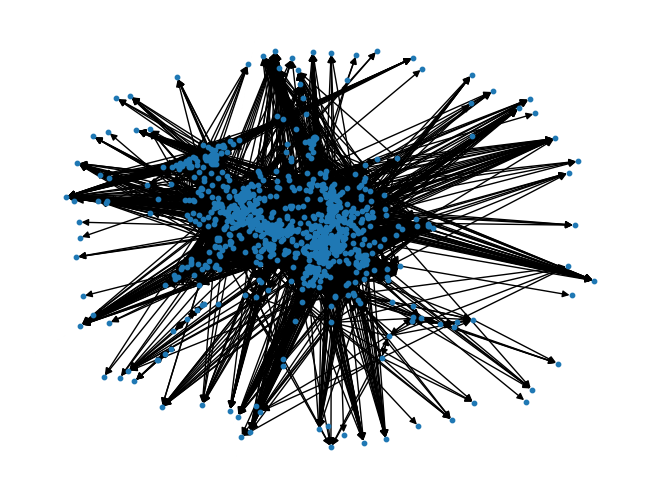

In [8]:
# draw small part of the graph
subgraph = graph.subgraph(list(graph.nodes())[:1000])
nx.draw(subgraph, with_labels=False, node_size=10)

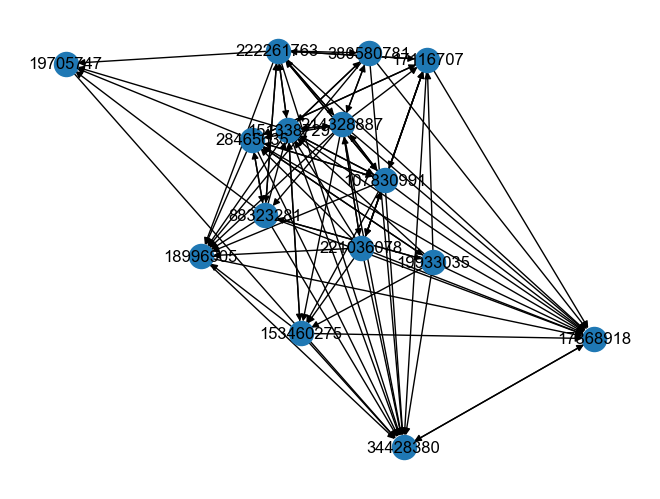

In [16]:
subgraph2 = graph.subgraph(list(graph.nodes())[:15])
nx.draw(subgraph2, with_labels=True)